In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [9]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [10]:
from catboost import CatBoostRegressor

In [28]:
df = pd.read_csv('cardekho_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
df=df.drop(columns=['Car_Name'])
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])

X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

ada=AdaBoostRegressor(base_estimator=dt)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
y_pred=lgb.predict(X_test)

cat=CatBoostRegressor()
cat.fit(X_train,y_train)
y_pred=cat.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 6
[LightGBM] [Info] Start training from score 4.642292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [25]:
data = {'Model': ['Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost'],
        'Accuracy': [dt.score(X_test,y_test), ada.score(X_test,y_test), rf.score(X_test,y_test), gb.score(X_test,y_test),
                     xgb.score(X_test,y_test), lgb.score(X_test,y_test), cat.score(X_test,y_test)]}

df_accuracy = pd.DataFrame(data)
print(df_accuracy)


               Model  Accuracy
0      Decision Tree  0.952438
1           AdaBoost  0.949695
2      Random Forest  0.962561
3  Gradient Boosting  0.971472
4            XGBoost  0.961328
5           LightGBM  0.879401
6           CatBoost  0.964815


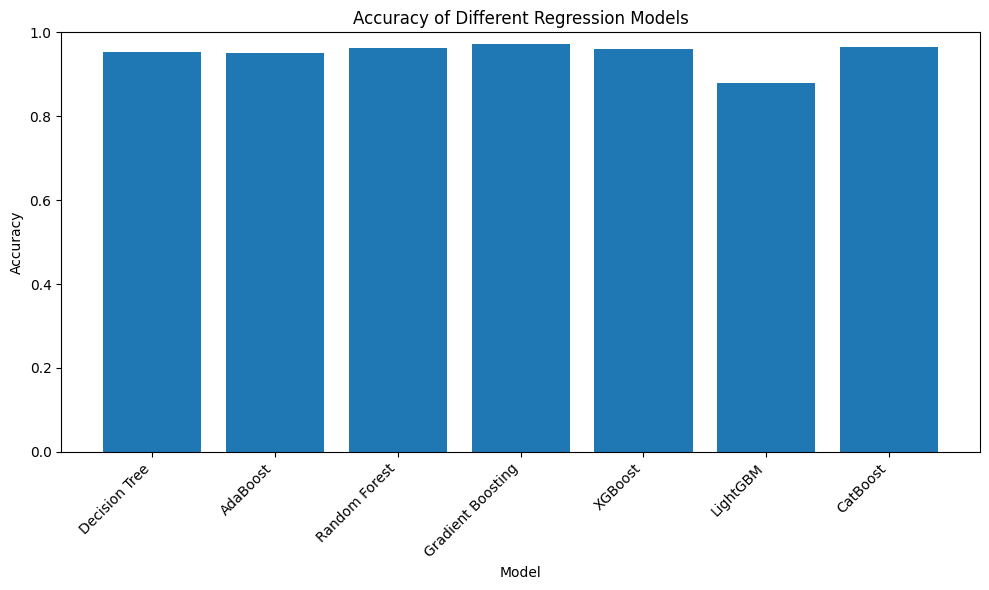

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Regression Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
model=LabelEncoder()

In [32]:
df['Fuel_Type']=model.fit_transform(df['Fuel_Type'])
df['Seller_Type']=model.fit_transform(df['Seller_Type'])
df['Transmission']=model.fit_transform(df['Transmission'])

In [33]:
X=df[['Year','Present_Price', 'Kms_Driven',
'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
Y=df[[ 'Selling_Price']]

# **Applying Multiple Models**

In [34]:
models=[LinearRegression(),AdaBoostRegressor(learning_rate=0.1,n_estimators=50),CatBoostRegressor(learning_rate=0.1,iterations=500,depth=5),RandomForestRegressor(n_estimators=100,random_state=42),GradientBoostingRegressor(n_estimators=100,learning_rate=0.1),XGBRegressor(n_estimators=100,learning_rate=0.1),LGBMRegressor(n_estimators=100,learning_rate=0.1),SVR(kernel='linear',C=0.1)]

In [35]:
x_tr,x_te,y_tr,y_te=train_test_split(X,Y)

In [36]:
def plot_fig(y_te,y_pr):
    plt.scatter(y_te,y_te,color='blue',label='Actual Labels')
    plt.scatter(y_te,y_pr,color='green',label='Predicted Labels')
    #plt.plot([min(y_te),max(y_te)],[min(y_te),max(y_te)],color='red',linestyle='--',label='Perfect Prediction')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title("Actual vs Predicted Labels")
    plt.tight_layout()
    plt.show()

model 1
Absolute_Score 1.5283375504575938
Mean_Squared_Score 7.897749598160404


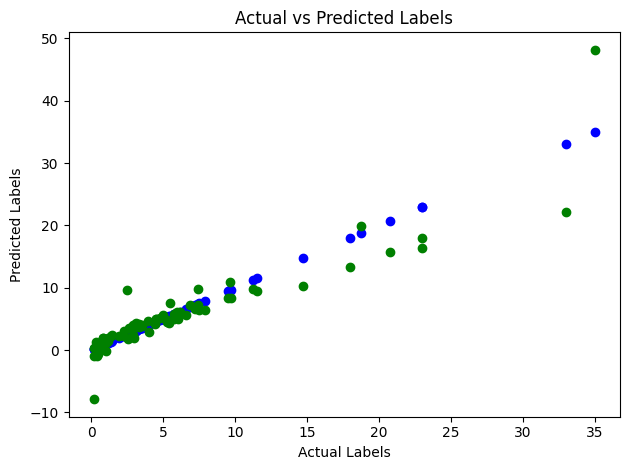

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 2
Absolute_Score 1.4019765915112132
Mean_Squared_Score 9.540692583065079


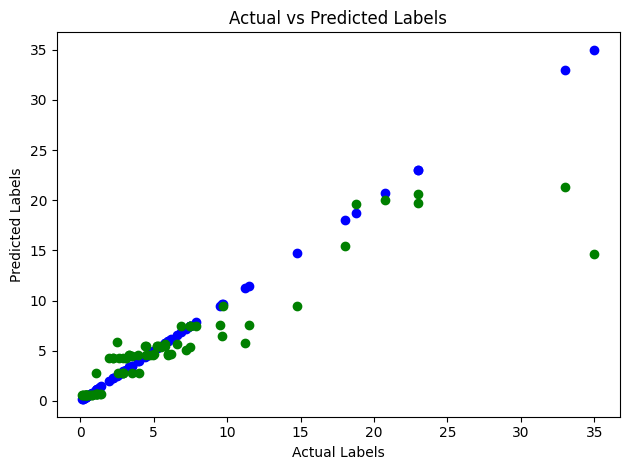

0:	learn: 3.9455772	total: 667us	remaining: 333ms
1:	learn: 3.7548332	total: 23.5ms	remaining: 5.86s
2:	learn: 3.5407954	total: 35.1ms	remaining: 5.82s
3:	learn: 3.3396013	total: 37.6ms	remaining: 4.66s
4:	learn: 3.1767763	total: 42.9ms	remaining: 4.24s
5:	learn: 3.0212176	total: 50.3ms	remaining: 4.14s
6:	learn: 2.8776880	total: 55ms	remaining: 3.87s
7:	learn: 2.7264507	total: 60.9ms	remaining: 3.75s
8:	learn: 2.6000698	total: 65.5ms	remaining: 3.57s
9:	learn: 2.4414132	total: 71.2ms	remaining: 3.49s
10:	learn: 2.3226351	total: 76ms	remaining: 3.38s
11:	learn: 2.2057073	total: 81.4ms	remaining: 3.31s
12:	learn: 2.1055447	total: 84ms	remaining: 3.15s
13:	learn: 2.0155338	total: 92.2ms	remaining: 3.2s
14:	learn: 1.9161319	total: 94.2ms	remaining: 3.05s
15:	learn: 1.8257656	total: 98.4ms	remaining: 2.98s
16:	learn: 1.7306095	total: 102ms	remaining: 2.88s
17:	learn: 1.6571872	total: 103ms	remaining: 2.76s
18:	learn: 1.5796183	total: 108ms	remaining: 2.74s
19:	learn: 1.5038237	total: 112ms

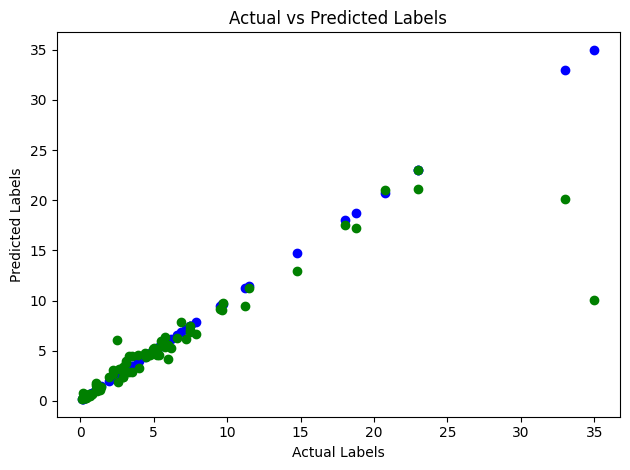

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


model 4
Absolute_Score 1.1906578947368418
Mean_Squared_Score 9.557624592105256


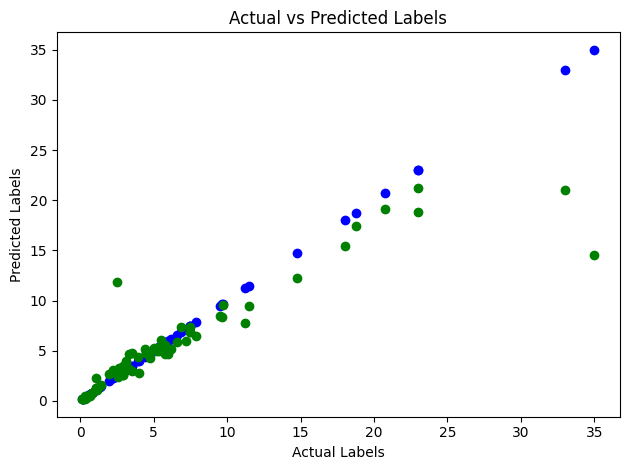

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 5
Absolute_Score 1.0383745188463385
Mean_Squared_Score 9.189024684952217


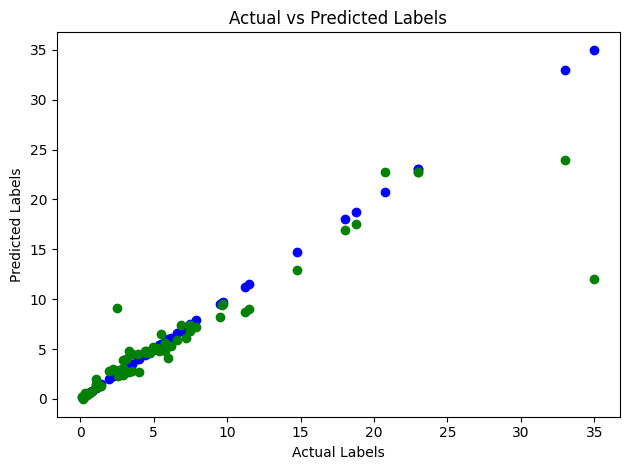

model 6
Absolute_Score 1.1153955536218063
Mean_Squared_Score 9.752591633677978


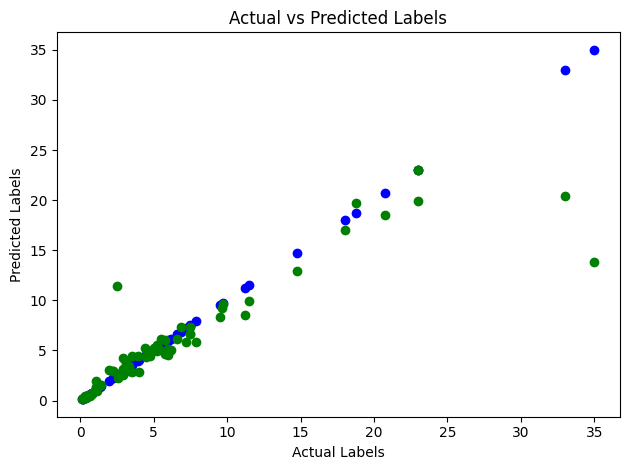

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 225, number of used features: 6
[LightGBM] [Info] Start training from score 4.291378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

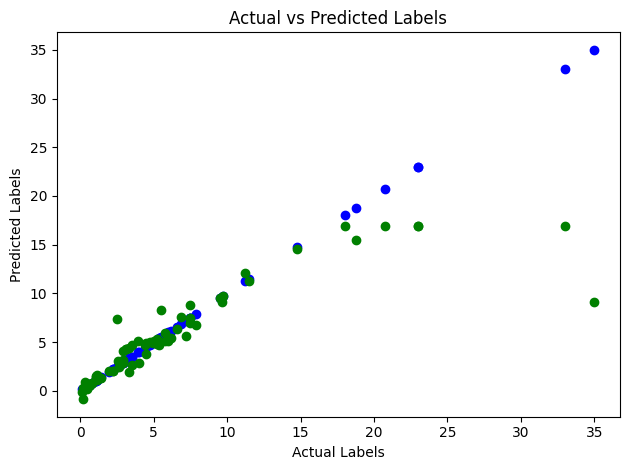

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 8
Absolute_Score 7.024535791135957
Mean_Squared_Score 106.98605068800323


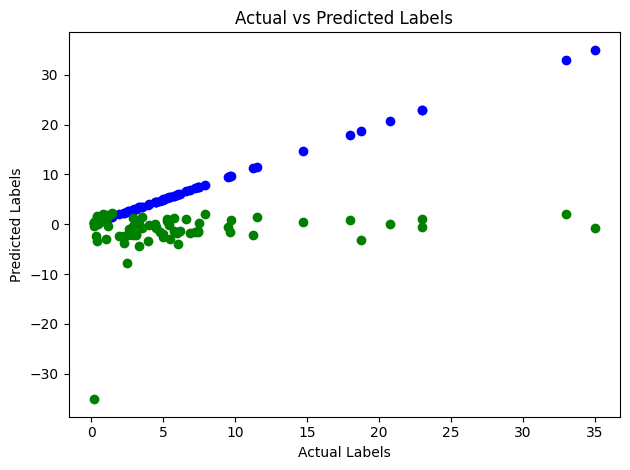

In [37]:
a=1
for i in models:
    i.fit(x_tr,y_tr)
    y_pr=i.predict(x_te)
    print(f"model {a}")
    a+=1
    print("Absolute_Score",mean_absolute_error(y_te,y_pr))
    print("Mean_Squared_Score",mean_squared_error(y_te,y_pr))
    plot_fig(y_te,y_pr)

In [40]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(x_tr, y_tr.values.ravel())  # .values.ravel() to convert y_tr to 1D array
    y_pred = model.predict(x_te)
    r2 = r2_score(y_te, y_pred)
    mse = mean_squared_error(y_te, y_pred)
    results[model_name] = {'R2 Score': r2, 'Mean Squared Error': mse}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: R2 Score = {metrics['R2 Score']}, Mean Squared Error = {metrics['Mean Squared Error']}")

0:	learn: 3.9455772	total: 460us	remaining: 230ms
1:	learn: 3.7548332	total: 1.58ms	remaining: 393ms
2:	learn: 3.5407954	total: 2.23ms	remaining: 369ms
3:	learn: 3.3396013	total: 2.93ms	remaining: 363ms
4:	learn: 3.1767763	total: 3.64ms	remaining: 360ms
5:	learn: 3.0212176	total: 4.27ms	remaining: 352ms
6:	learn: 2.8776880	total: 4.95ms	remaining: 348ms
7:	learn: 2.7264507	total: 5.59ms	remaining: 344ms
8:	learn: 2.6000698	total: 6.18ms	remaining: 337ms
9:	learn: 2.4414132	total: 6.76ms	remaining: 331ms
10:	learn: 2.3226351	total: 7.36ms	remaining: 327ms
11:	learn: 2.2057073	total: 7.93ms	remaining: 323ms
12:	learn: 2.1055447	total: 8.64ms	remaining: 324ms
13:	learn: 2.0155338	total: 9.5ms	remaining: 330ms
14:	learn: 1.9161319	total: 10.3ms	remaining: 334ms
15:	learn: 1.8257656	total: 11.1ms	remaining: 336ms
16:	learn: 1.7306095	total: 11.8ms	remaining: 334ms
17:	learn: 1.6571872	total: 12.4ms	remaining: 332ms
18:	learn: 1.5796183	total: 13.1ms	remaining: 333ms
19:	learn: 1.5038237	tot